# C11 Image Gradients
ver de https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_gradients/py_gradients.html

In [1]:
#init modules
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
# para importar una funcion desde UtilsNotebook.ipynb estamos intentando la solucion de 
# https://stackoverflow.com/questions/44116194/import-a-function-from-another-ipynb-file: pip install ipynb --upgrade
#hemos instalado ipynb con pips desde un cmd window en el enviroment aqtest
import ipynb #para importar una funcion de otro ipynb file
from ipynb.fs.full.UtilsNotebook import disp2img

#set basic vars
baseDir=os.path.join('..','..','ExamplesRepo')
#file name, tuple with only one name, use baseFileNameList=('j.png',) because baseFileNameList=('j.png') is a string
# ver https://medium.com/@GalarnykMichael/python-basics-9-tuples-tuple-manipulation-and-the-fibonacci-sequence-2d0da4e2d326
baseFileNameList=('j.png','sudoku-original.jpg','jnoise2.png', 'cameraman.tif', 'eight.tif')

ModuleNotFoundError: No module named 'matplotlib'

In [3]:
#store the images in a dictionary
#using a comprehension solution 
imgDict={name: None for name in baseFileNameList}
for name in baseFileNameList:
    fileName=os.path.join(baseDir, name)
    imgDict[name] = cv2.imread(fileName, cv2.COLOR_RGB2BGR)   

## Sobel and Scharr Derivatives

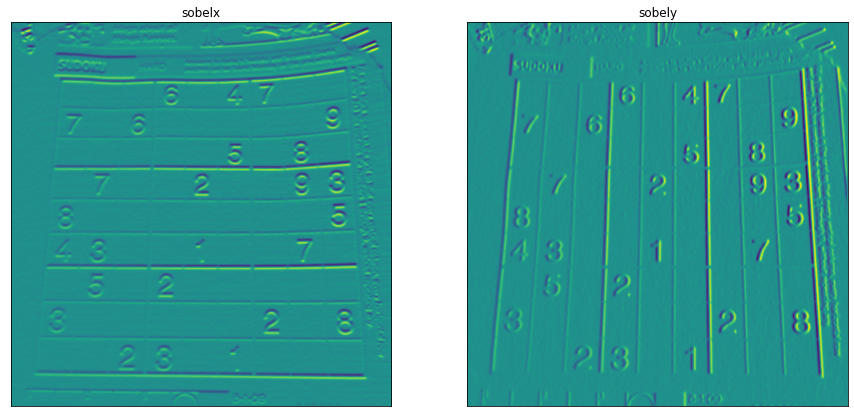

In [4]:
name=baseFileNameList[1]
img=imgDict[name]
img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
sobelx = cv2.Sobel(img,cv2.CV_64F,0,1, ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,1,0, ksize=5)

disp2img(sobelx, sobely,  img2Title="sobely", img1Title="sobelx", figSize=(15,15));

## laplacian

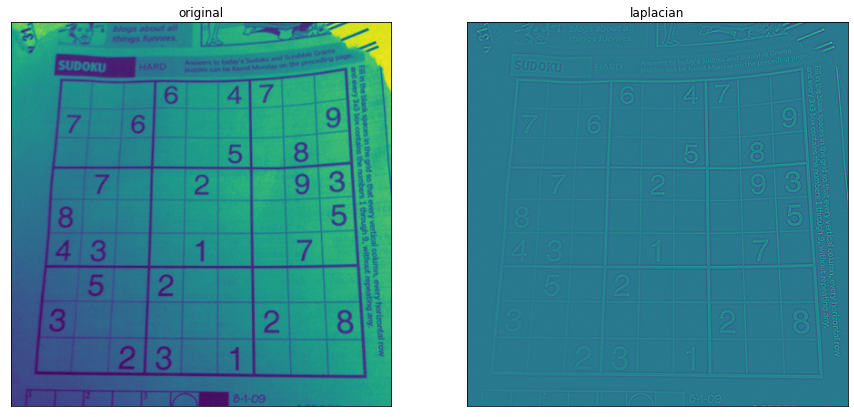

In [5]:
name=baseFileNameList[1]
img=imgDict[name]
img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
disp2img(img, laplacian,  img2Title="laplacian", img1Title="original", figSize=(15,15));

In [6]:
%whos

Variable           Type        Data/Info
----------------------------------------
baseDir            str         ..\..\ExamplesRepo
baseFileNameList   tuple       n=5
cv2                module      <module 'cv2' from 'C:\\A<...>\cv2.cp37-win_amd64.pyd'>
disp2img           function    <function disp2img at 0x00000182AC7A4E18>
fileName           str         ..\..\ExamplesRepo\eight.tif
img                ndarray     423x419: 177237 elems, type `uint8`, 177237 bytes (173.0830078125 kb)
imgDict            dict        n=5
ipynb              module      <module 'ipynb' from 'C:\<...>ges\\ipynb\\__init__.py'>
laplacian          ndarray     423x419: 177237 elems, type `float64`, 1417896 bytes (1.3522109985351562 Mb)
name               str         sudoku-original.jpg
np                 module      <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
os                 module      <module 'os' from 'C:\\An<...>nvs\\AQTest\\lib\\os.py'>
plt                module      <module 'matplotlib.pyplo<

## One Important Matter!

In the next example, output datatype is cv2.CV_8U or np.uint8. But there is a slight problem with that. Black-to-White transition is taken as Positive slope (it has a positive value) while White-to-Black transition is taken as a Negative slope (It has negative value). So when you convert data to np.uint8, all negative slopes are made zero. In simple words, you miss that edge.

If you want to detect both edges, better option is to keep the output datatype to some higher forms, like cv2.CV_16S, cv2.CV_64F etc, take its absolute value and then convert back to cv2.CV_8U. Below code demonstrates this procedure for a horizontal Sobel filter and difference in results.

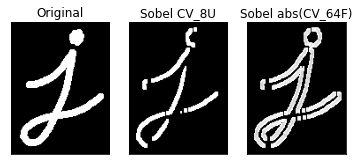

In [9]:
name=baseFileNameList[0]
img=imgDict[name]
img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)

# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])

plt.show()


In [10]:
from __future__ import print_function